In [2]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sentence_transformers import SentenceTransformer
import numpy as np

# Loading the cleaned dataset

df = pd.read_csv('C:/Users/HomePC/Documents/DA Projects/Med NLP classification Proj/data/processed/cleaned_mtsamples.csv')
df = df.dropna(subset=['cleaned_text', 'medical_specialty'])

# Encoding target
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label'] = le.fit_transform(df['medical_specialty'])

# Spliting the data
x_train, x_test, y_train, y_test = train_test_split(
    df['cleaned_text'], df['label'], test_size=0.2, random_state=42, stratify=df['label']
)

In [3]:
# Load Transformer Model

model = SentenceTransformer('all-MiniLM-L6-v2')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

c:\Users\HomePC\Documents\DA Projects\Med NLP classification Proj\venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\HomePC\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [4]:
# Generating embeddings

x_train_embeddings = model.encode(x_train.tolist(), batch_size=32, show_progress_bar=True)
x_test_embeddings = model.encode(x_test.tolist(), batch_size=32, show_progress_bar=True)

print('Train embedding shape:', x_train_embeddings.shape)
print('Test embedding shape:', x_test_embeddings.shape)

Batches:   0%|          | 0/125 [00:00<?, ?it/s]

Batches:   0%|          | 0/32 [00:00<?, ?it/s]

Train embedding shape: (3972, 384)
Test embedding shape: (994, 384)


In [6]:
# Training Classifier on embeddings

clf = LogisticRegression(max_iter=300)
clf.fit(x_train_embeddings, y_train)

y_pred = clf.predict(x_test_embeddings)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.34004024144869216
F1 Score: 0.3097331086627201


In [7]:
# Evaluating the Results

print('\nClassification Report:')
print(classification_report(y_test, y_pred, target_names=le.classes_))


Classification Report:
                                precision    recall  f1-score   support

          Allergy / Immunology       0.00      0.00      0.00         1
                       Autopsy       0.00      0.00      0.00         2
                    Bariatrics       0.00      0.00      0.00         4
    Cardiovascular / Pulmonary       0.39      0.47      0.43        74
                  Chiropractic       0.00      0.00      0.00         3
    Consult - History and Phy.       0.26      0.52      0.35       103
    Cosmetic / Plastic Surgery       0.00      0.00      0.00         5
                     Dentistry       0.00      0.00      0.00         5
                   Dermatology       0.00      0.00      0.00         6
          Diets and Nutritions       0.00      0.00      0.00         2
             Discharge Summary       1.00      0.14      0.24        22
          ENT - Otolaryngology       0.33      0.16      0.21        19
        Emergency Room Reports       0.

c:\Users\HomePC\Documents\DA Projects\Med NLP classification Proj\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\HomePC\Documents\DA Projects\Med NLP classification Proj\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\HomePC\Documents\DA Projects\Med NLP classification Proj\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` par

In [8]:
# Save Model and Artifacts

joblib.dump(clf, 'C:/Users/HomePC/Documents/DA Projects/Med NLP classification Proj/models/bert_embedding_classifier.pkl')
joblib.dump(model, 'C:/Users/HomePC/Documents/DA Projects/Med NLP classification Proj/models/sentence_transformer.pkl')
joblib.dump(le, 'C:/Users/HomePC/Documents/DA Projects/Med NLP classification Proj/models/label_encoder.pkl')
print("Transformer Model and artifacts saved successfully.")

Transformer Model and artifacts saved successfully.


In [9]:
# Quick Inference Test

sample_text = ['Patient presented with chest pain and underwent ECG and angioplasty.']
sample_emb = model.encode(sample_text)
pred = clf.predict(sample_emb)
print('Predicted Specialty:', le.inverse_transform(pred)[0])

Predicted Specialty:  Cardiovascular / Pulmonary


In [16]:
# Randomized Hyperparameter Tuning

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.ensemble import HistGradientBoostingClassifier
gb_model = HistGradientBoostingClassifier(max_iter=200, random_state=42)

# Defining parameter distributions
param_dist = {
    'max_iter': randint(100, 400),
    'learning_rate': uniform(0.01, 0.1),
    'max_depth': randint(3, 6),
    'min_samples_leaf': randint(2, 10),
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator = gb_model,
    param_distributions = param_dist,
    n_iter = 20,
    scoring = 'f1_weighted',
    cv = 3,
    verbose = 1,
    random_state = 42,
    n_jobs = -1
)

# Fit to the training data
random_search.fit(x_train_embeddings, y_train)

# Print best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best F1 Score:", random_search.best_score_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'learning_rate': np.float64(0.02733646535077721), 'max_depth': 3, 'max_iter': 149, 'min_samples_leaf': 9}
Best F1 Score: 0.176427495710027


In [25]:
# Final evaluation and saving the tuned model

import joblib
from sklearn.metrics import classification_report, confusion_matrix

# Select the best model (prefer randomized search result if available), otherwise fallback to clf
try:
    best_model = random_search.best_estimator_
except NameError:
    best_model = clf

# Evaluating tuned model on test data
y_pred = best_model.predict(x_test_embeddings)

# Evaluation metrics
print('Final test Accuracy:', accuracy_score(y_test, y_pred))
print('Final test F1 Score:', f1_score(y_test, y_pred, average='weighted'))
print('\nFinal Classification Report:\n', classification_report(y_test, y_pred, target_names=le.classes_))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

# Save the final model and vectorizer
joblib.dump(best_model, 'C:/Users/HomePC/Documents/DA Projects/Med NLP Classification Proj/models/final_gradientboost_model.pkl')
tfidf = joblib.load("C:/Users/HomePC/Documents/DA Projects/Med NLP classification Proj/models/tfidf_vectorizer.pkl")

from pathlib import Path

models_dir = Path("C:/Users/HomePC/Documents/DA Projects/Med NLP Classification Proj/models")
models_dir.mkdir(parents=True, exist_ok=True)

# ensure 'tfidf' is defined or loaded before this line
joblib.dump(tfidf, models_dir / "final_tfidf_vectorizer.pkl")

print("Final model and vectorizer saved successfully.")


Final test Accuracy: 0.12877263581488935
Final test F1 Score: 0.12466050386674224

Final Classification Report:
                                 precision    recall  f1-score   support

          Allergy / Immunology       0.00      0.00      0.00         1
                       Autopsy       0.00      0.00      0.00         2
                    Bariatrics       0.00      0.00      0.00         4
    Cardiovascular / Pulmonary       0.15      0.14      0.14        74
                  Chiropractic       0.00      0.00      0.00         3
    Consult - History and Phy.       0.11      0.14      0.12       103
    Cosmetic / Plastic Surgery       0.00      0.00      0.00         5
                     Dentistry       0.00      0.00      0.00         5
                   Dermatology       0.00      0.00      0.00         6
          Diets and Nutritions       0.00      0.00      0.00         2
             Discharge Summary       0.00      0.00      0.00        22
          ENT - Otolar

c:\Users\HomePC\Documents\DA Projects\Med NLP classification Proj\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\HomePC\Documents\DA Projects\Med NLP classification Proj\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\HomePC\Documents\DA Projects\Med NLP classification Proj\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` par

Final model and vectorizer saved successfully.


Top 10 Performing Classes:

                             precision    recall  f1-score     support
 Pain Management              0.461538  0.500000  0.480000   12.000000
 Sleep Medicine               0.250000  0.250000  0.250000    4.000000
 Surgery                      0.205761  0.229358  0.216920  218.000000
 Obstetrics / Gynecology      0.153846  0.193548  0.171429   31.000000
 Gastroenterology             0.145455  0.177778  0.160000   45.000000
 Cardiovascular / Pulmonary   0.153846  0.135135  0.143885   74.000000
 Orthopedic                   0.136364  0.126761  0.131387   71.000000
 Urology                      0.129032  0.129032  0.129032   31.000000
accuracy                      0.128773  0.128773  0.128773    0.128773
 General Medicine             0.142857  0.115385  0.127660   52.000000

Lowest 10 Performing Classes:

                           precision  recall  f1-score  support
Hospice - Palliative Care        0.0     0.0       0.0      1.0
IME-QME-Work Comp etc.         

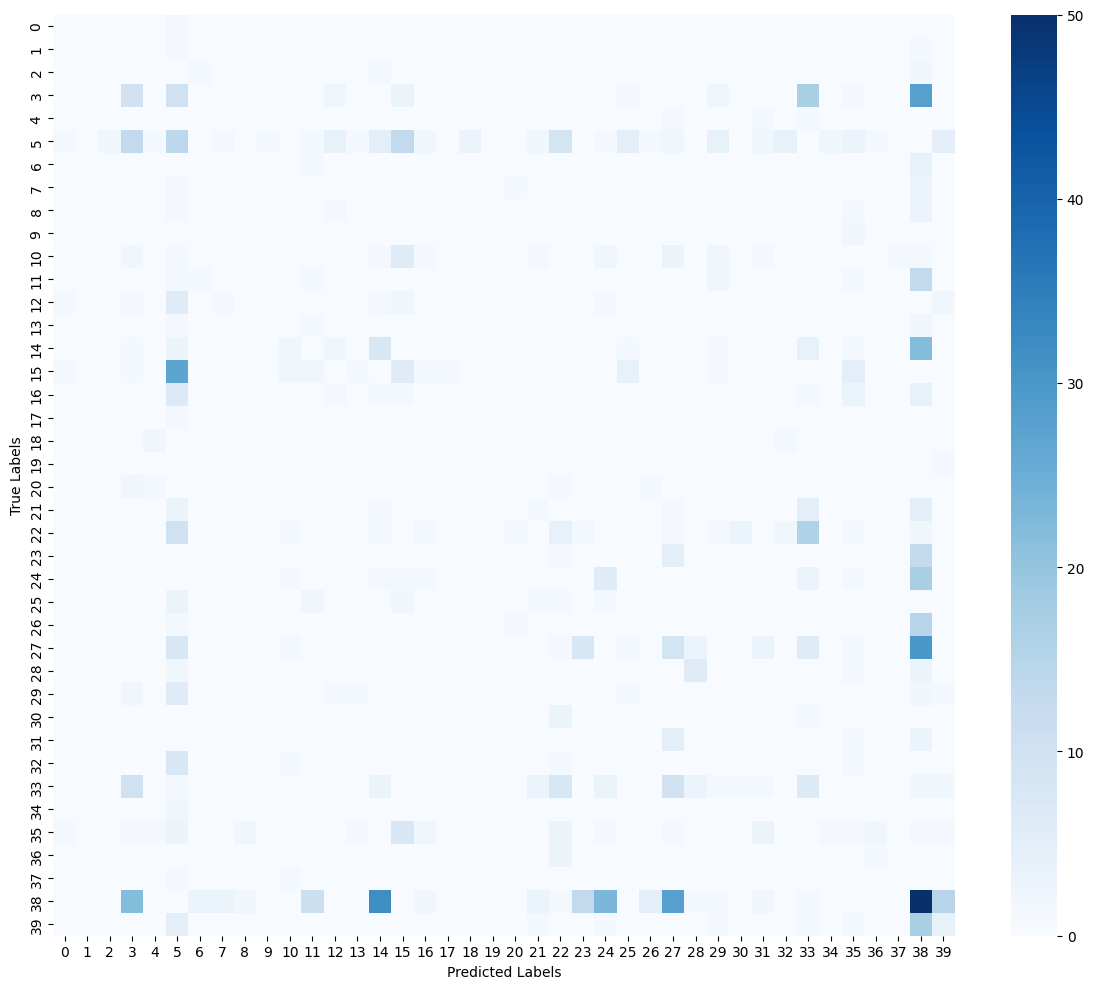


Total misclassified samples: 866

Text: duplex ultrasound leg right leg duplex imaging carried according normal protocol mhz imaging probe using b mode ultrasound deep vein imaged level common femoral popliteal vein deep vein demonstrated compressibility without evidence intraluminal thrombus increased echogenicity long saphenous system d...
True Label: 3
Predicted Label: 33

Text: exam three view right foot reason exam right foot trauma finding three view right foot obtained comparison study evidence fracture dislocation significant degenerative change obstructive osseous lesion identified radiopaque foreign body impression negative right foot...
True Label: 33
Predicted Label: 27

Text: cc seizure hx patient initially evaluated uihc year age well month prior evaluation started spell described dizzy spell lasting several second one minute duration occurred quite infrequently able resume activity immediately following episode spell became frequent prolonged time initial evaluation oc.

In [27]:
# Error analysis and Performance Insights

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import classification_report

# Get predictions for clarity
y_pred = best_model.predict(x_test_embeddings)

# Creating a df friendly label mapping
unique_labels = np.unique(y_test)

# Build a DataFrame from the classification report
report_dict = classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True, zero_division=0)
report_df = pd.DataFrame(report_dict).transpose()

# Show Class-level Summary
report_df = report_df.sort_values(by='f1-score', ascending=False)
print('Top 10 Performing Classes:\n')
print(report_df.head(10))

print('\nLowest 10 Performing Classes:\n')
print(report_df.tail(10))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred, labels=unique_labels)
plt.figure(figsize=(12,10))
sns.heatmap(cm, cmap='Blues', xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()
plt.show()

# Inspecting a few misclassified samples
errors = np.where(y_test != y_pred)[0]
print(f'\nTotal misclassified samples: {len(errors)}')

for i in errors[:5]:  
    print(f'\nText: {x_test.iloc[i][:300]}...')
    print(f'True Label: {y_test.iloc[i]}')
    print(f'Predicted Label: {y_pred[i]}')